<a href="https://colab.research.google.com/github/Borys1no/Borys1no/blob/main/oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import os

In [60]:
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


def estandarizar(ex):
    return (ex - ex.mean()) / ex.std()



drive.mount('/content/drive')
np.set_printoptions(precision=10, suppress=True)
datos = pd.read_csv("/content/drive/My Drive/data.csv")
print(datos.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          WL     C/G     G/N     P/G       400     399.5       399     398.5  \
0  AGUACLARA  0.0000  1.0680  0.0398  0.038911  0.040531  0.042010  0.043341   
1    AGUAL02  0.0000  0.8207  0.6335  0.091295  0.094527  0.097521  0.100251   
2      ARCHT  0.0001  1.1932  0.4353  0.055657  0.058236  0.060606  0.062744   
3       ASUS     NaN     NaN     NaN  0.059881  0.062731  0.065331  0.067625   
4     BALREP  0.0000  1.0621  0.0297  0.057428  0.059920  0.062179  0.064190   

        398     397.5  ...     194.5       194     193.5       193     192.5  \
0  0.044509  0.045531  ... -0.031470 -0.032718 -0.031738 -0.031211 -0.033137   
1  0.102680  0.104834  ... -0.038201 -0.038967 -0.038387 -0.038184 -0.039430   
2  0.064628  0.066275  ... -0.035908 -0.036677 -0.036339 -0.036238 -0.003810   
3  0.069610  0.071288  ... -0.011623 -0.011494 -0.010422 -0.010354 -0.

In [61]:
completos =datos.dropna()
t_comp =datos.iloc[:, 2:5].copy()
t_esp = datos.iloc[:, 5:].copy()

t_espe_std = estandarizar(datos.iloc[:, 5:].copy())
c_comp_std = estandarizar(completos.iloc[:, 2:5].copy())


c_espe_std = t_espe_std[t_espe_std.index.isin(c_comp_std.index)].copy()

In [62]:
print(datos)

           WL     C/G     G/N     P/G       400     399.5       399     398.5  \
0   AGUACLARA  0.0000  1.0680  0.0398  0.038911  0.040531  0.042010  0.043341   
1     AGUAL02  0.0000  0.8207  0.6335  0.091295  0.094527  0.097521  0.100251   
2       ARCHT  0.0001  1.1932  0.4353  0.055657  0.058236  0.060606  0.062744   
3        ASUS     NaN     NaN     NaN  0.059881  0.062731  0.065331  0.067625   
4      BALREP  0.0000  1.0621  0.0297  0.057428  0.059920  0.062179  0.064190   
5        BASE     NaN     NaN     NaN  0.065730  0.068994  0.072007  0.074728   
6          BB     NaN     NaN     NaN  0.059393  0.062003  0.064382  0.066484   
7       CAT01  0.0000  0.7846  0.1930  0.051442  0.054170  0.056639  0.058819   
8       CAT02  0.0000  0.8006  0.4708  0.056960  0.059772  0.062323  0.064584   
9       CHANK     NaN     NaN     NaN  0.059933  0.062564  0.064960  0.067098   
10        CHE     NaN     NaN     NaN  0.029683  0.030960  0.032128  0.033180   
11        CHP     NaN     Na

In [63]:
from sklearn.linear_model import LogisticRegression

X= c_espe_std
y= c_comp_std

X,y

(       399.5       399     398.5       398     397.5       397     396.5  \
 0  -1.164676 -0.987396 -1.181798 -1.186281 -1.188489 -1.188919 -1.187887   
 1   2.400452  2.155215  2.308548  2.275456  2.250328  2.231865  2.218575   
 2   0.004304  0.065321  0.008178  0.010982  0.014388  0.018260  0.022586   
 4   0.115510  0.154400  0.096912  0.088421  0.080795  0.073647  0.067065   
 7  -0.264122 -0.159266 -0.232509 -0.223866 -0.219468 -0.218912 -0.220951   
 8   0.105726  0.162541  0.121034  0.123568  0.123294  0.121013  0.117098   
 13 -0.823866 -0.674240 -0.824814 -0.826862 -0.830245 -0.833718 -0.837756   
 14  0.273133  0.309914  0.284334  0.286058  0.285049  0.282046  0.277803   
 18  0.025485  0.060464 -0.022665 -0.044606 -0.065210 -0.084170 -0.101881   
 20  1.276614  1.191379  1.261908  1.256983  1.253774  1.253130  1.254038   
 22 -1.288903 -1.087402 -1.281810 -1.273754 -1.263217 -1.250703 -1.236784   
 23 -0.088574 -0.008892 -0.069657 -0.065357 -0.063761 -0.065106 -0.068654   

In [64]:
class ModelW:
  def __init__(self, nombre, model):
    self.nombre = nombre
    self.model= model
    self.estimaciones = None
    self.combinado = None
  def fit(self, X, y):
    self.model.fit(X, y)
  def predict(self, X):
    return self.model.predict(X)

  def ejecutar(self):
    if os.path.exists(f'output/{self.nombre}') is False:
        os.makedirs(f'output/{self.nombre}')

    self.estimaciones = pd.DataFrame(columns=["est_C/G", "est_G/N",
                                              "est_P/G"],
                                     data=self.predict(t_espe_std))
    self.estimaciones.insert(loc=0, column="WL", value=datos["WL"])



    self.combinado = datos.copy()
    self.indices_vacios = self.combinado[self.combinado["C/G"].isna()].index
    self.combinado['STATE']='original'
    self.combinado.loc[self.combinado["C/G"].isna(), 'STATE']= 'estimacion'
    self.combinado.loc[self.combinado["C/G"].isna(), 'C/G']= self.estimaciones.values[:, 1][self.indices_vacios]
    self.combinado.loc[self.combinado["G/N"].isna(), 'G/N']= self.estimaciones.values[:, 2][self.indices_vacios]
    self.combinado.loc[self.combinado["P/G"].isna(), 'P/G']= self.estimaciones.values[:, 3][self.indices_vacios]
    self.combinado =self.combinado[["WL", "STATE", "C/G", "G/N", "P/G"]]
    print(self.combinado)
  def guardar(self):
    if not os.path.exists('/content/drive/My Drive/ estimaciones'):
      os.makedirs('/content/drive/My Drive/estimaciones', exist_ok=True)
    if not os.path.exists('/content/drive/My Drive/combinado'):
      os.makedirs('/content/drive/My Drive/combinado')


    self.estimaciones.to_csv(f"/content/drive/My Drive/estimaciones/{self.nombre}_estimaciones.csv", index=False)
    self.combinado.to_csv(f"/content/drive/My Drive/combinado/{self.nombre}_combinado.csv",index=False)

  def graficar(self):

    plt.scatter(
        self.combinado[self.combinado["STATE"]== 'original']['G/N'],
        self.combinado[self.combinado["STATE"]== "original"]["P/G"],
        c='blue',
    )
    plt.scatter(
        self.combinado[self.combinado["STATE"]== 'estimacion']['G/N'],
        self.combinado[self.combinado["STATE"]== "estimacion"]["P/G"],
        c='red',
    )
    plt.xlabel('G/N')
    plt.ylabel('P/G')
    plt.show()




In [65]:
modelos ={
    "linear": LinearRegression()

}

for m in modelos:
  modelo = ModelW(m, modelos[m])
  modelo.fit(X, y.values)
  modelo.ejecutar()
  modelo.guardar()
  error=(modelo.combinado.values[c_comp_std.index][:, 3:6]- modelo.estimaciones.values[c_comp_std.index][:, 2:5]).astype(float)
  print(error)

           WL       STATE       C/G       G/N       P/G
0   AGUACLARA    original       0.0     1.068    0.0398
1     AGUAL02    original       0.0    0.8207    0.6335
2       ARCHT    original    0.0001    1.1932    0.4353
3        ASUS  estimacion  0.660283  0.802998  0.481528
4      BALREP    original       0.0    1.0621    0.0297
5        BASE  estimacion -0.151175 -0.622104  0.981591
6          BB  estimacion  1.446567  0.142237  0.436546
7       CAT01    original       0.0    0.7846     0.193
8       CAT02    original       0.0    0.8006    0.4708
9       CHANK  estimacion  1.114557 -0.442812  0.581542
10        CHE  estimacion -0.194803 -0.744389 -1.724341
11        CHP  estimacion  -0.61044  0.958788   0.38336
12         CI  estimacion  1.391816 -0.879817  2.190278
13    CTRON01    original       0.0    0.8397    0.5696
14    CTRON02    original       0.0    0.8368    0.4346
15         GP  estimacion   0.45188 -1.093478  -0.52733
16      HLSJP  estimacion -0.817714  0.623805 -1

In [43]:
from sklearn.model_selection import train_test_split
X, y =datos.iloc[:, 1:].values, datos.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.3,
                   stratify= None,
                   random_state=0)



In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [45]:
#estandarizamos las caracteristicas
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_std = sc.fit_transform(X_train_imputed)
X_test_std =sc.transform(X_test_imputed)


In [46]:
from sklearn.decomposition import PCA
n_components= 2
pca = PCA(n_components=n_components)

pca.fit(X_train_std)

X_train_pca=pca.transform(X_train_std)
X_test_pca= pca.transform(X_test_std)

print("X train pca", X_train_pca.shape)
print("X test pca", X_test_pca.shape)

X train pca (32, 2)
X test pca (15, 2)


In [47]:
print(X_train_std)

[[ 0.           -0.            0.           ... -0.4676564389
  -0.4641048917 -0.4667841241]
 [ 5.4879547246  1.808233598  -1.7336398243 ... -0.579518514
  -0.5971154641 -0.6119750103]
 [ 0.           -0.            0.           ...  0.3368817462
   0.2694633223  0.2745019636]
 ...
 [ 0.           -0.            0.           ...  0.8005996487
   0.768103897   0.7474508692]
 [-0.3429971703  1.067294484  -2.5120748366 ... -0.3496162196
  -0.391593452  -0.4026130331]
 [-0.3429971703  1.6295772509 -0.6597567242 ... -0.6018146194
  -0.6080650329 -0.5980371403]]


In [48]:
print(X_train_pca)

[[-14.6123099317  -4.3844554163]
 [-14.8536071902   1.22386583  ]
 [ 17.2325476795   5.6477241344]
 [ -8.5712574095   0.1188282744]
 [-17.4890998042  12.1729421373]
 [ -6.6728978013  -1.6775102593]
 [-13.1453697357  -6.9238635688]
 [ -1.2106415804  -5.2243508276]
 [ -9.3681748719  -1.1733854733]
 [ -4.1475850485   5.0850453068]
 [ -0.9397981108  -3.7119555505]
 [-14.2819800787  -7.274714239 ]
 [  4.4036871397   1.5810126771]
 [ -8.3304153635  -1.9435910802]
 [ 53.8567926473  -0.6040775324]
 [ -0.481382932    1.2196405863]
 [-12.414801839   21.7692987033]
 [-10.4409055846 -10.2256464713]
 [ -1.1837753898  -8.8271768617]
 [-12.1340057111  -0.2649421519]
 [ 18.572154615    1.4753449266]
 [-13.6500525837  -2.116209554 ]
 [ 26.1732711566   2.6429902483]
 [ -5.5745192796  -0.3612894391]
 [ -7.5396327072  -1.615537299 ]
 [ 16.6900008229  -7.055105273 ]
 [-21.4873832288  -0.460407025 ]
 [ -4.0908606823   6.1846307929]
 [ 53.9529980395  -0.6562102544]
 [ 32.3954941407   1.6374903476]
 [ -8.0330

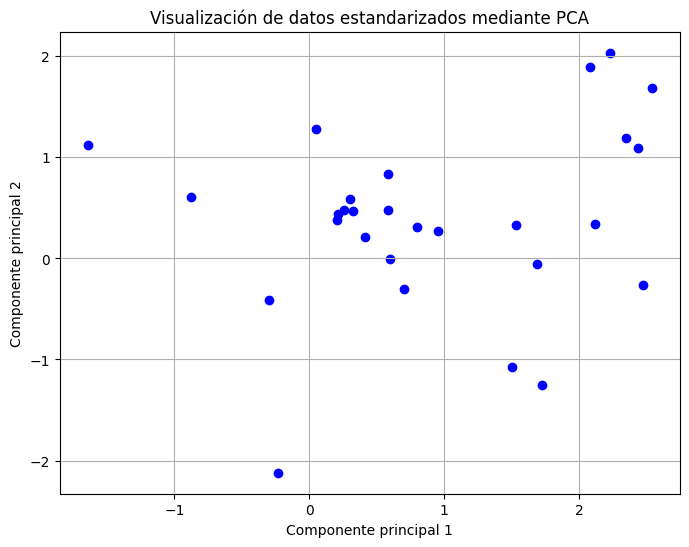

In [49]:
import matplotlib.pyplot as plt
X_train_pca =[
 [ 2.4414153042,  1.0908665833],
 [-0.2295433248, -2.1204799898],
 [ 0.9520675734,  0.2699969737],
 [ 2.4767464851, -0.2642799939],
 [ 1.5326076876,  0.3338776983],
 [ 0.4145460957,  0.2108796336],
 [ 0.0503153352,  1.2766273007],
 [ 0.59852518,   -0.0043712978],
 [-0.8795666812,  0.6027373297],
 [ 1.7239033881, -1.2558959159],
 [ 2.348190651,   1.1945760864],
 [ 0.259557764,   0.4766567153],
 [ 0.3259827158,  0.4652055022],
 [ 0.5813074752,  0.4749282859],
 [ 2.1214072318,  0.340031691 ],
 [-1.6405545925,  1.1250138259],
 [ 0.2137243546,  0.438840798 ],
 [ 0.7993264613,  0.3109081511],
 [ 2.078734184,   1.8891143863],
 [ 0.7032882966, -0.3000699811],
 [ 0.3003376029,  0.5858766274],
 [ 1.6925709613, -0.0575456878],
 [ 0.2097038948,  0.3767803072],
 [ 2.2286202875,  2.0352227265],
 [ 2.539190651,   1.6861053959],
 [ 0.5861349187,  0.8393635147],
 [ 1.506532042,  -1.0716027438],
 [-0.2997719433, -0.4148639231]
]
plt.figure(figsize=(8, 6))
plt.scatter([x[0] for x in X_train_pca], [x[1] for x in X_train_pca], color='blue')
plt.title('Visualización de datos estandarizados mediante PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid(True)
plt.show()

In [50]:
import numpy as np
cov_mat = np.cov(X_train_std.T)

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues\n%s'% eigen_vals)


Eigenvalues
[364.0611764283+0.j  41.8641495225+0.j  10.9193622975+0.j
   6.9658354116+0.j   2.6186336535+0.j   2.00321725  +0.j
   1.6164594401+0.j   1.3727735254+0.j   1.2974678766+0.j
   1.1635863234+0.j   0.6805167903+0.j   0.5389251225+0.j
   0.422793652 +0.j   0.3244388665+0.j   0.2679473707+0.j
   0.2494953162+0.j   0.219594652 +0.j   0.1574870563+0.j
   0.1470165669+0.j   0.1285796108+0.j   0.1123996101+0.j
   0.1007682443+0.j   0.0796940736+0.j   0.0708808722+0.j
   0.0670476354+0.j   0.0508431953+0.j   0.0479240527+0.j
   0.0412993915+0.j   0.0360664788+0.j   0.0314851573+0.j
   0.0195539104+0.j   0.          +0.j   0.          -0.j
  -0.          +0.j  -0.          -0.j   0.          +0.j
   0.          +0.j   0.          -0.j   0.          +0.j
   0.          -0.j   0.          +0.j   0.          -0.j
   0.          +0.j   0.          -0.j   0.          +0.j
   0.          -0.j   0.          +0.j   0.          -0.j
  -0.          +0.j  -0.          -0.j   0.          +0.j
 

In [51]:
tot = sum(eigen_vals)
var_exp= [(i/tot)for i in
          sorted (eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [52]:
print(len(cum_var_exp))

424


/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


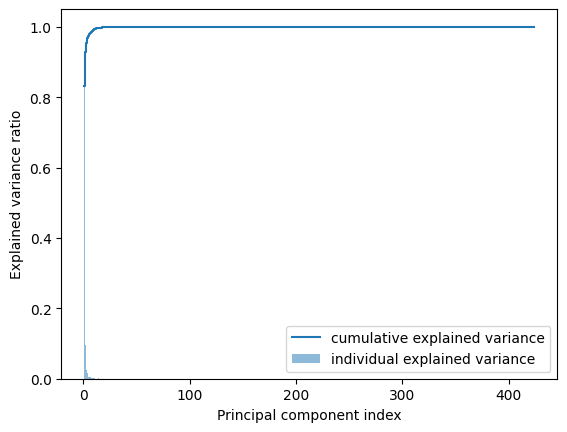

In [53]:
import matplotlib.pyplot as plt
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [54]:
#Lista de tuplas
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, 1])
              for i in range(len(eigen_vals))]


#Ordena las tuplas

eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [55]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))


print('Matriz W: \n', w)


print(np.size(w))

Matriz W: 
 [[ 0.0009242363+0.j  0.0009242363+0.j]
 [-0.0122974687+0.j -0.0122974687+0.j]
 [-0.063650225 +0.j -0.063650225 +0.j]
 [-0.1472846496+0.j -0.1472846496+0.j]
 [-0.1476149173+0.j -0.1476149173+0.j]
 [-0.124198975 +0.j -0.124198975 +0.j]
 [-0.1478799403+0.j -0.1478799403+0.j]
 [-0.147868169 +0.j -0.147868169 +0.j]
 [-0.1477943257+0.j -0.1477943257+0.j]
 [-0.147679559 +0.j -0.147679559 +0.j]
 [-0.1475408559+0.j -0.1475408559+0.j]
 [-0.1473918471+0.j -0.1473918471+0.j]
 [-0.1472503479+0.j -0.1472503479+0.j]
 [-0.1471313679+0.j -0.1471313679+0.j]
 [-0.1470511101+0.j -0.1470511101+0.j]
 [-0.1470184967+0.j -0.1470184967+0.j]
 [-0.1470455735+0.j -0.1470455735+0.j]
 [-0.147136842 +0.j -0.147136842 +0.j]
 [-0.1472905448+0.j -0.1472905448+0.j]
 [-0.1474979207+0.j -0.1474979207+0.j]
 [-0.147740665 +0.j -0.147740665 +0.j]
 [-0.147993884 +0.j -0.147993884 +0.j]
 [-0.148222982 +0.j -0.148222982 +0.j]
 [-0.1484067331+0.j -0.1484067331+0.j]
 [-0.148516074 +0.j -0.148516074 +0.j]
 [-0.14852002

In [56]:
print("shape de X_train_std:", X_train_std.shape)
print("shape de w", w.shape)

shape de X_train_std: (32, 424)
shape de w (424, 2)


In [57]:
X_train_std[0].dot(w)


array([-4.3844554163+0.j, -4.3844554163+0.j])

In [58]:
X_train_pca= X_train_std.dot(w)

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


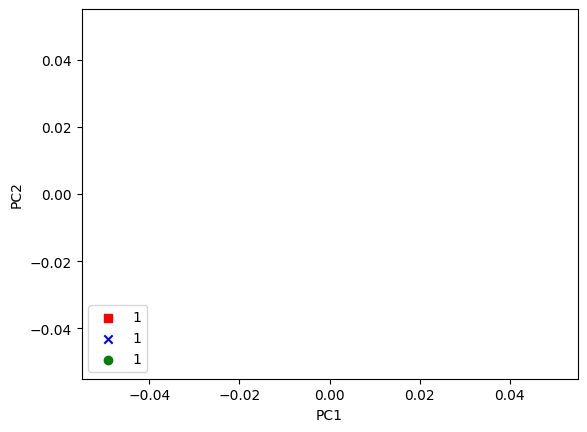

In [59]:
colors=['r', 'b', 'g']
markers= ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train==1, 0],
              X_train_pca[y_train==1, 1],
              c=c, label=1, marker=m)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()